In [2]:
import pandas as pd
import numpy as np

In [3]:
import re

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from bs4 import BeautifulSoup
import requests

In [5]:
url = 'https://www.vlr.gg/stats'

In [8]:
website = requests.get(url)

In [9]:
website.status_code

200

In [10]:
soup = BeautifulSoup(website.content)

In [141]:
Player = []
Agent = []
Rounds = []
ACS = []
K = []
D = []
A = []
Kmax = []
KDA  = []

In [142]:
player = soup.find_all('div',{'class':'text-of'})
for p in player:
    if p is None:
        Player.append(np.nan)
    else:
        Player.append(p.text)

In [143]:
agents = soup.find_all('td',{'class':'mod-agents'})
for a in agents:
    if a.img is None:
        Agent.append(np.nan)
    else:
        Agent.append(a.img.get('src'))


In [144]:
round = soup.find_all('td',{'class':'mod-rnd'})
for r in round:
    if r is None:
        Rounds.append(np.nan)
    else:
        Rounds.append(r.text)

In [145]:
acs = soup.find_all('div',{'class':'color-sq'})
for ac in acs:
    if ac is None:
        ACS.append(np.nan)
    else:
        ACS.append(ac.text)

In [146]:
kmax = soup.find_all('td',{'class':'mod-a mod-kmax'})
for k in kmax:
    if k.text is None:
        Kmax.append(np.nan)
    else:
        Kmax.append(k.text)

In [147]:
KDA = soup.find_all('table',{'class':'wf-table mod-stats'})
for x in KDA:
    kda = x.findAll('td',{'class':''})

In [148]:
kills = []

In [149]:
for k in kda:
        if k is None:
            kills.append(np.nan)
        else:
            kills.append(k.text)

In [151]:
len(kills)

8175

In [152]:
len(ACS)

14715

In [153]:
len(Rounds)

1635

In [154]:
len(Kmax)

1635

In [155]:
len(Agent)

1635

In [156]:
len(Player)

1635

In [157]:
ACS = ACS[0::9]

In [158]:
K = kills[0::5]

In [159]:
D = kills[1::5]

In [160]:
A = kills[2::5]

In [161]:
vlr = pd.DataFrame({'Player':Player, 'Agent':Agent, 'Rounds':Rounds, 'ACS':ACS, 'Kills':K, 'Deaths':D, 'Assists':A, 'Max Kills':Kmax, })

In [162]:
vlr

,Player,Agent,Rounds,ACS,Kills,Deaths,Assists,Max Kills
0,Keiti,/img/vlr/game/agents/jett.png,373,317.9,405,235,72,\n\n\t\t\t\t\t\t\t35\t\t\t\t\t\t\n
1,Shalaby,/img/vlr/game/agents/raze.png,501,317.1,567,343,116,\n\n\t\t\t\t\t\t\t32\t\t\t\t\t\t\n
2,ZmjjKK,/img/vlr/game/agents/raze.png,471,313.3,507,331,97,\n\n\t\t\t\t\t\t\t29\t\t\t\t\t\t\n
3,Seoldam,/img/vlr/game/agents/jett.png,370,311.6,404,249,77,\n\n\t\t\t\t\t\t\t28\t\t\t\t\t\t\n
4,ScreaM,/img/vlr/game/agents/reyna.png,825,307.0,864,531,253,\n\n\t\t\t\t\t\t\t30\t\t\t\t\t\t\n
...,...,...,...,...,...,...,...,...
1630,Synergy,/img/vlr/game/agents/omen.png,333,142.9,158,286,72,\n\n\t\t\t\t\t\t\t16\t\t\t\t\t\t\n
1631,LAF,/img/vlr/game/agents/omen.png,574,140.9,287,401,148,\n\n\t\t\t\t\t\t\t21\t\t\t\t\t\t\n
1632,Okapi,/img/vlr/game/agents/cypher.png,369,139.7,183,275,53,\n\n\t\t\t\t\t\t\t19\t\t\t\t\t\t\n
1633,M1ST,/img/vlr/game/agents/brimstone.png,519,134.0,239,391,143,\n\n\t\t\t\t\t\t\t22\t\t\t\t\t\t\n


In [211]:
class regex:
    def extract(x):
        return ''.join(x)
    def extnum(x):
        return re.findall('\d+',x)
    def convint(x):
        return int(x)
    def convfloat(x):
        return float(x)

In [171]:
regex = lambda x : re.findall('astra|breach|brimstone|cypher|jett|killjoy|omen|phoenix|raze|reyna|sage|skye|sova|viper|yoru',x)

vlr['Agent'] = vlr.Agent.apply(regex)

In [178]:
vlr['Agent'] = vlr.Agent.apply(regex.extract)

In [185]:
vlr['Max Kills'] = vlr['Max Kills'].apply(regex.extnum)

In [187]:
vlr['Max Kills'] = vlr['Max Kills'].apply(regex.extract)

In [212]:
vlr['Rounds'] = vlr['Rounds'].apply(regex.convint)
vlr['ACS'] = vlr['ACS'].apply(regex.convfloat)
vlr['Kills'] = vlr['Kills'].apply(regex.convint)
vlr['Deaths'] = vlr['Deaths'].apply(regex.convint)
vlr['Assists'] = vlr['Assists'].apply(regex.convint)
vlr['Max Kills'] = vlr['Max Kills'].apply(regex.convint)

In [214]:
vlr['KD'] = vlr['Kills']/ vlr['Deaths']

In [215]:
vlr.head()

,Player,Agent,Rounds,ACS,Kills,Deaths,Assists,Max Kills,KD
0,Keiti,jett,373,317.9,405,235,72,35,1.723404
1,Shalaby,raze,501,317.1,567,343,116,32,1.653061
2,ZmjjKK,raze,471,313.3,507,331,97,29,1.531722
3,Seoldam,jett,370,311.6,404,249,77,28,1.622490
4,ScreaM,reyna,825,307.0,864,531,253,30,1.627119


In [239]:
vlr.to_csv('C:\\Users\welcome\Data Science\Python\Data\\vlr.csv')

In [5]:
vlr = pd.read_csv('C:\\Users\welcome\Data Science\Python\Data\\vlr.csv')

## Data Analysis

### Univariate Analysis

In [13]:
# Most Agents used
vlr.Agent.value_counts()/len(vlr.Agent) * 100

omen         16.024465
sova         16.024465
jett         15.107034
raze         11.743119
cypher       10.458716
killjoy       7.706422
sage          5.688073
breach        4.709480
phoenix       3.914373
reyna         2.874618
brimstone     2.629969
skye          1.773700
viper         1.223242
yoru          0.061162
astra         0.061162
Name: Agent, dtype: float64

Text(0.5, 1.0, 'Percentage of Agents used')

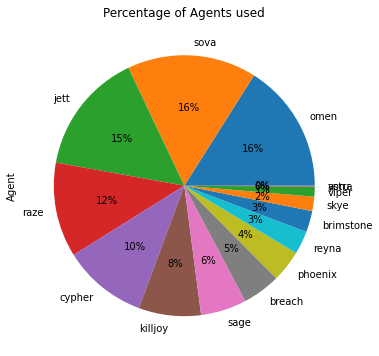

In [117]:
plt.figure(figsize =(6,6))
vlr.Agent.value_counts().plot.pie(autopct = '%0.0f%%')
plt.title('Percentage of Agents used')


In [29]:
# Highest Kills in a round
vlr['Max Kills'].value_counts().index.max()

47

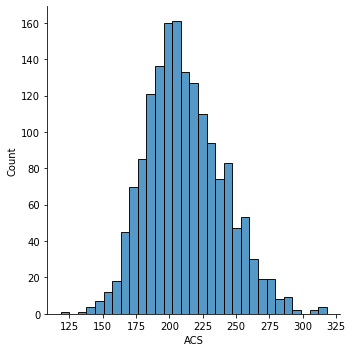

In [119]:
sns.displot(vlr['ACS'])

<AxesSubplot:ylabel='KD'>

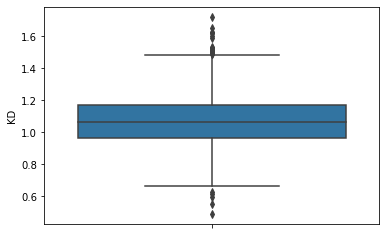

In [67]:
sns.boxplot(y = vlr['KD'])

### Bivariate Analysis

In [47]:
# Top 10 players with highest KD (min rounds = 300)
vlrmax = vlr.loc[vlr['Rounds'] >= 300]

vlrmax.groupby(by ='Player')['KD'].mean().sort_values(ascending = False)[0:10]

Player
Keiti        1.723404
Shalaby      1.653061
ScreaM       1.627119
cNed         1.623262
Seoldam      1.622490
sheydos      1.605159
taLenT7      1.589189
ZmjjKK       1.531722
BEAST        1.529231
popogachi    1.516529
Name: KD, dtype: float64

In [50]:
# Top Players with Highest Kills (min rounds = 300)
vlrmax.groupby(by ='Player')['Kills'].mean().sort_values(ascending = False)[0:10]

Player
b0ssy         1586.0
zekken        1568.0
Winsum        1475.0
DENYA         1427.0
RetrQ         1400.0
wronski       1330.0
cNed          1284.0
Stronglegs    1276.0
f0rsakeN      1269.0
Menace        1266.0
Name: Kills, dtype: float64

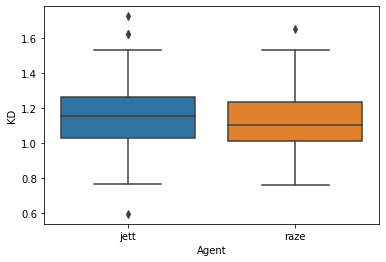

In [75]:
# Jett Players Vs Raze Players

vlrjr = vlr.loc[vlr['Agent'].isin(['jett','raze'])]

plt.xlim(0.55,2.00)
sns.boxplot(x = vlrjr['Agent'], y = vlrjr['KD'])
plt.show()

<AxesSubplot:xlabel='Agent', ylabel='ACS'>

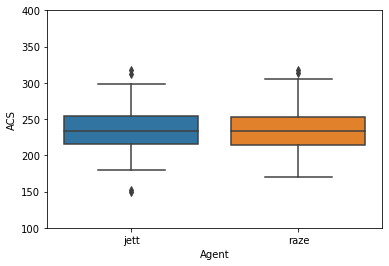

In [89]:
# Jett vs Raze ACS Comparison
plt.ylim(50*2,20*20)
sns.boxplot(x = vlrjr['Agent'], y = vlrjr['ACS'])

In [99]:
# Reyna Vs Omen

vlrro = vlr.loc[vlr['Agent'].isin(['reyna','omen'])]

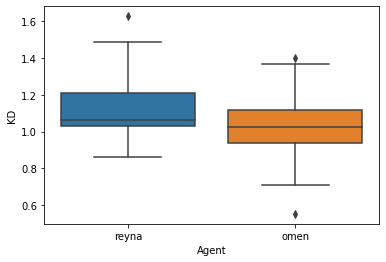

In [100]:
# Reyna Vs Omen KD compare

plt.xlim(0.55,2.00)
sns.boxplot(x = vlrro['Agent'], y = vlrro['KD'])
plt.show()

<AxesSubplot:xlabel='Agent', ylabel='ACS'>

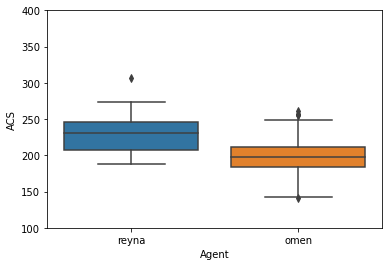

In [101]:
# Reyna Vs Omen ACS compare

plt.ylim(50*2,20*20)
sns.boxplot(x = vlrro['Agent'], y = vlrro['ACS'])

<AxesSubplot:xlabel='Agent', ylabel='Kills'>

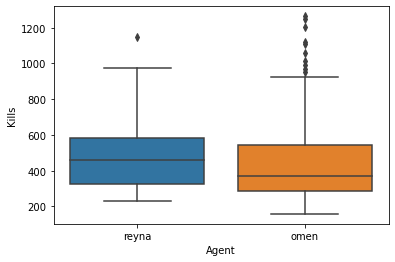

In [103]:
# Reyna Vs Omen Kills comparison

sns.boxplot(x = vlrro['Agent'], y = vlrro['Kills'])

<AxesSubplot:xlabel='Kills', ylabel='ACS'>

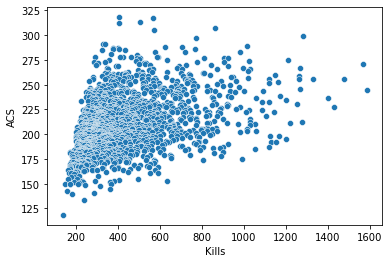

In [104]:
# Kills Vs ACS correlation

sns.scatterplot(x = vlr['Kills'], y = vlr['ACS'])

In [105]:
vlr['Kills'].corr(vlr['ACS'])

0.3665005529206907

Kills and ACS are said to be not Corelated

<AxesSubplot:xlabel='Rounds', ylabel='Kills'>

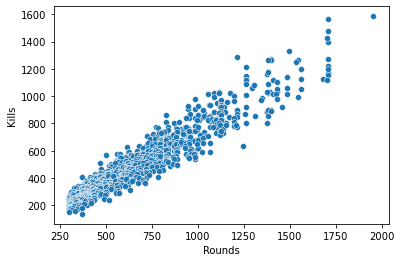

In [107]:
# Kills Vs Rounds correlation

sns.scatterplot(x = vlr['Rounds'], y = vlr['Kills'])

In [108]:
vlr['Rounds'].corr(vlr['Kills'])

0.9558945629929643

From above Graph, we can say Rounds and Kills are highly correlated